# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#set the style of all graphs to seaborn:
sns.set_style('whitegrid')
import statsmodels.api as sm
from sklearn.cluster import KMeans

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [38]:
# Load the data
example_bank_data = pd.read_csv('Example-bank-data.csv')

# Check the data
example_bank_data.columns
example_bank_data.drop('Unnamed: 0', axis=1,inplace=True)
#example_bank_data.head()
#example_bank_data

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [39]:
# Encode outcome column values as numbers
bank_data_mapped=example_bank_data.copy()
bank_data_mapped['y']=bank_data_mapped['y'].map({'yes':1,'no':0})
bank_data_mapped.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


In [34]:
#sns.countplot(x='y',data=bank_data_mapped)

### Declare the dependent and independent variables

In [40]:
#We are predicting if
# the client will subscribe a term deposit
# so y column is the y variable
# and 'duration' the x variable
y=bank_data_mapped['y']
x1=bank_data_mapped['duration']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

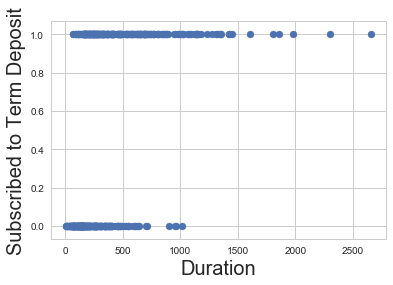

In [41]:
#create a scatter plot
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Subscribed to Term Deposit',fontsize=20)
plt.show()

In [50]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
#x
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Aug 2019   Pseudo R-squ.:                  0.2121
Time:                        14:23:04   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [51]:
results_log.pred_table()

array([[204.,  55.],
       [104., 155.]])